# Historic Bitcoin Price Data Prediction

Extensive research was carried out on historic Bitcoin price prediction via Multiple Linear Regression. Originally, MLR was used as a "reference model" to develop a framework/pipeline, where one can easily switch between different ML models and metrics to perform Bitcoin network feature selection with the Nondominated Sorting Genetic Algorithm II. Initially, the results were surprisingly good and thus further analysis was conducted. However, it turned out that the remarkable results were based on bad assumptions. 

## NSGA-II - A Multiobjective Evolutionary Algorithm

Nondominated Sorting Genetic Algorithm II is an elitist, multiobjective evolutionary algorithm which overcomes the common problems of nondominated sorting evolutionary algorithms: computational complexity, nonelitist approach, reliance on the concept of sharing, thus requiring an extra parameter. Since we try to extract meaningful features from the Bitcoin network to predict the said cryptocurrency's price as accurately as possible, it is crucial to design our feature selection process to minimize the number of features while maximizing the predictive power of our model. Minimizing the feature set is necessary to reduce the variance of our model, thus reducing the probability of overfitting while the need to maximize predictive power is self-explanatory. It is clear that we need to solve a multi-objective optimization problem. As it was shown by Siedlecki and Sklansky that genetic algorithms are successful at large scale feature selection and due to the nature of our optimization problem, NSGA-II can be considered as a good candidate for this problem.

## Multiple Linear Regression

As mentioned above, the model was originally chosen to serve as a reference for developing a highly configurable pipline for Bitcoin feature selection and price prediction. We opted to use Ordianry Least Squares as an estimator for the model. The reason of choice was again simplicity. Regarding the usefuleness of the model for price prediction, one would think that it is highly unlikely that it will successfully predict price movements since the model presumes linear relationships between the features of the Bitcoin network and the prices of Bitcoin, while it also assumes that the input features are independent. The initial results contradicted these assumptions. After some further research, it turned out that the good results stemmed from the inclusion of features that included the market price itself. Clearly, if we would like to predict the market price of Bitcoin based on the most relevant networks features, we have to exclude the features that are based on the market price itself. The assumption, that we will know the values of these independent variables before the market price which we wish to predict, is flawed. The research group of Madan et al. at Stanford University commited this mistake as well. Their Binomial Generalized Linear Model yielded seemingly stellar classification results.

## Feature Selection

The following 20 features were downloaded from blockchain.info:

* 'transaction-fees-usd'
* 'network-deficit'
* 'n-transactions'
* 'n-transactions-excluding-popular'
* 'n-transactions-excluding-chains-longer-than-10'
* 'n-transactions-excluding-chains-longer-than-100'
* 'n-transactions-excluding-chains-longer-than-1000'
* 'n-transactions-excluding-chains-longer-than-10000'
* 'n-unique-addresses'
* 'n-transactions-per-block'
* 'n-orphaned-blocks'
* 'output-volume'
* 'estimated-transaction-volume-usd'
* 'trade-volume'
* 'tx-trade-ratio'
* 'hash-rate'
* 'difficulty'
* 'median-confirmation-time'
* 'bitcoin-days-destroyed'
* 'avg-block-size'

Siedlecki and Sklansky demonstrated that genetic algorithms perform well on large scale feature selection problems. They used feature sets where the number of features exceeded 20.  Hence, our problem is a good candidate for the GA approach. The reasons behind the limit 20 is discussed in their paper. 

In addition to running the GA multiple times with different parameters, we visualized the features compared to the market price on regression plots in order to manually assist the feature selection. Since GAs won't necessarily find the best possible subset of features due to their nature, some manual intervention is a good idea. Furthermore, the relevance of the selected features and the model's predictive capability were verified by creating residual plots. 

## Data Splitting

The collected daily data ranges from January 4, 2012 to April 13, 2016 which results in ~1500 data points. The model is trained on 70% of the data. The remaining 30% is then halved. The first half is used in the GA feature selection for validation, while the last 15% is reserved for testing the model. 

## Metrics

**R<sup>2</sup> - Goodnes-of-Fit**

R<sup>2</sup> (or Coefficient of Determination) is a commonly used metric when evaluating regression models which indicates how well the regression line approximates the given data. Its value is in the range of [0,1], where 1 indicates a perfect fit. One problem with R<sup>2</sup> is that it does not filter out irrelevant features. One can add new, meaningless variables to the model while increasing its R<sup>2</sup> score. Also this metric could potentially over-, under-predict the data, thus other metrics should be used in conjuction.
It is calculated as follows:

**Root-Mean-Square Error**

RMSE is a good metric for numerical predictions which indicates the sample standard deviation between the observed and predicted data. It is usually a preferable metric over both the Mean Absolute Error and the Mean-Square error because RMSE penalizes larger errors more than the MAE, which is crucial to good price prediction, while it is easier to interpret than the MSE due to having the same dimensions as the predicted values (y).
It is calculated as follows:

**Mean Absolute Error**

As mentioned before, RMSE is usually the preferred regression metric over MAE, due to penalizing large errors. However, MAE is worth considering in cases of noisy data. We do not want to penalize large errors that are irrelevant. For instance, during Winton Capital's stock price prediction Kaggle competition, MAE was a more fitting error metric for that problem compared to the RMSE. 
MAE is calculated as follows:

## Results

As mentioned before, due to the nature of EAs, one cannot be sure that the extracted features are the most meaningful ones. Hence, it is a good idea to run the EA several times and use some intuition to improve the quality of the feature set. Some of the features that regularly came up initially, were **market-cap**, either **n-transactions** / **n-unique-addresses** / **n-transactions-per-block**, **trade-volume**, **output-volume**, **tx-trade-ratio**, **cost-per-transaction**, **miners-revenue**, **bitcoin-days-destroyed** and **avg-block-size**. If we observe the pairplots of these variables compared to the market price of Bitcoin in USD, which we would like to predict, one can immediately see that **market-cap**, **cost-per-transaction** and **miners-revenue** are highly collinear with the price of Bitcoin. Also, when running the algorithm with large populations through high number of iterations, these were the selected features in general, in addition to **n-unique-addresses**. After some further experimenting, our final feature set is as follows: 
**market-cap**, **n-unique-addresses**, **trade-volume**, **output-volume**, **cost-per-transaction**. This results in an RMSE of 13.03, an MAE of 10.12 and R<sup>2</sup> of 0.97. Considering that the price of Bitcoin during this period was between ~\$225 and ~\$470, an MAE of 10.12 and an RMSE of 13.03, with units in dollars, can be considered quite good. After visualizing the actual and predicted prices, we can see that our model usually overestimates the price of Bitcoin but captures the price changes quite accurately. However, this approach is flawed due to the reasons discussed above. Both **market-cap**, **cost-per-transaction** and **miners-revenue** depend on the market price itself, thus they were later replaced by some other features. The 98.7% classification accuracy result by Madan et al. originated from the inclusion of these features. Actually, a 100% classification result can be achieved if only the **market-cap** is included. 
After revising our approach and selecting the feature set more carefully, the following features were selected by the EA most commonly: **transaction-fees-usd**, **network-deficit**, **output-volume**, **estimated-transaction-volume-usd**, **tx-trade-ratio** and **bitcoin-days-destroyed**. Only the **network-deficit** demonstrated high collinearity with the market price. In our final model, we opted to replace **tx-trade-ratio** with **trade-volume** after analysing the regression plots. This final setting yielded an R2 score of 0.79, a RMSE of \$35.96 which compared to the price spread gives an error of 14.5%, while the MAE resulted in \$29.04 and 11.71%.
Comparing the price sign changes of the actual and predicted values gave an accuracy score of 55.98%, which is not too reassuring. We may conclude, that despite the careful feature selection, multiple linear regression is not a good model for Bitcoin price prediction, as expected.

# References

* http://www.sciencedirect.com/science/article/pii/0167865589900378
* http://sci2s.ugr.es/sites/default/files/files/Teaching/OtherPostGraduateCourses/MasterEstructuras/bibliografia/Deb_NSGAII.pdf
* http://cs229.stanford.edu/proj2014/Isaac%20Madan,%20Shaurya%20Saluja,%20Aojia%20Zhao,Automated%20Bitcoin%20Trading%20via%20Machine%20Learning%20Algorithms.pdf

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information deap, matplotlib, numpy, pandas, seaborn, sklearn

Software versions
Python 3.5.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.1.2
OS Linux 3.13.0 62 generic x86_64 with debian jessie sid
deap 1.0
matplotlib 1.5.1
numpy 1.10.4
pandas 0.18.0
seaborn 0.7.0
sklearn 0.17.1
Fri May 06 11:02:07 2016 BST

In [2]:
from nsga2 import *
from IPython.display import display
from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn import preprocessing as preproc, datasets, linear_model
from sklearn.metrics import mean_squared_error as mse, accuracy_score as acc_scr, mean_absolute_error as mae

#pd.set_option('html', False)
np.set_printoptions(threshold=np.nan)
sns.set()

# Data pre-processing

In [3]:
widgets.interact(prep_data, date_from = '1/4/2012', date_to = '4/13/2016')
%time prep_data('1/4/2012', '4/13/2016')

CPU times: user 2.19 s, sys: 19.7 ms, total: 2.21 s
Wall time: 2.7 s


# Regression plots

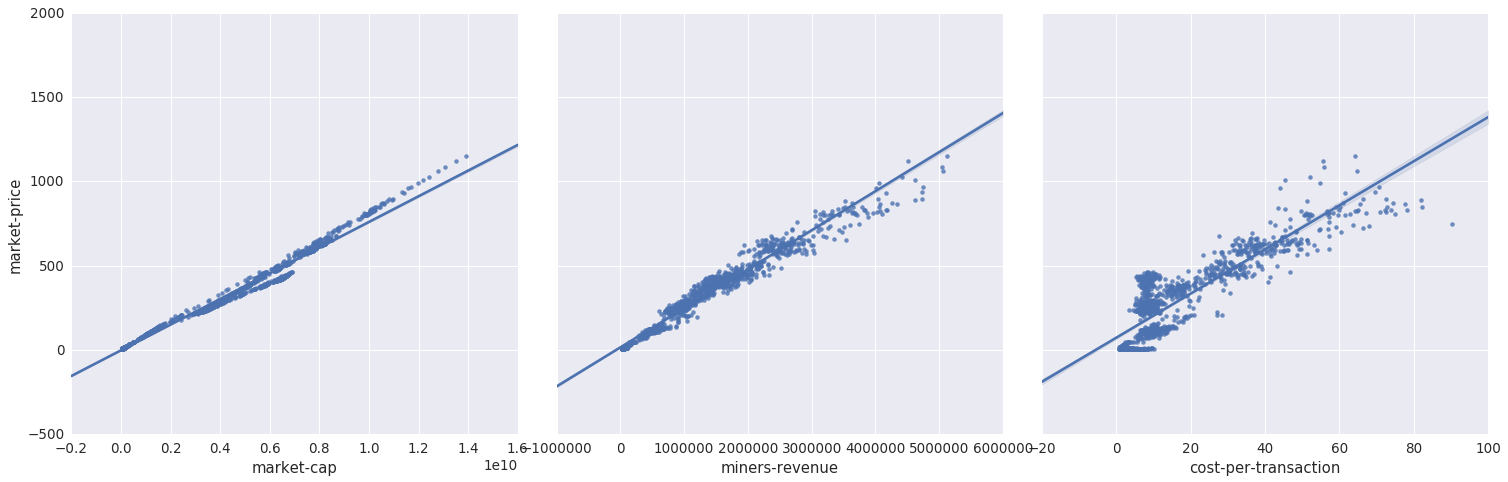

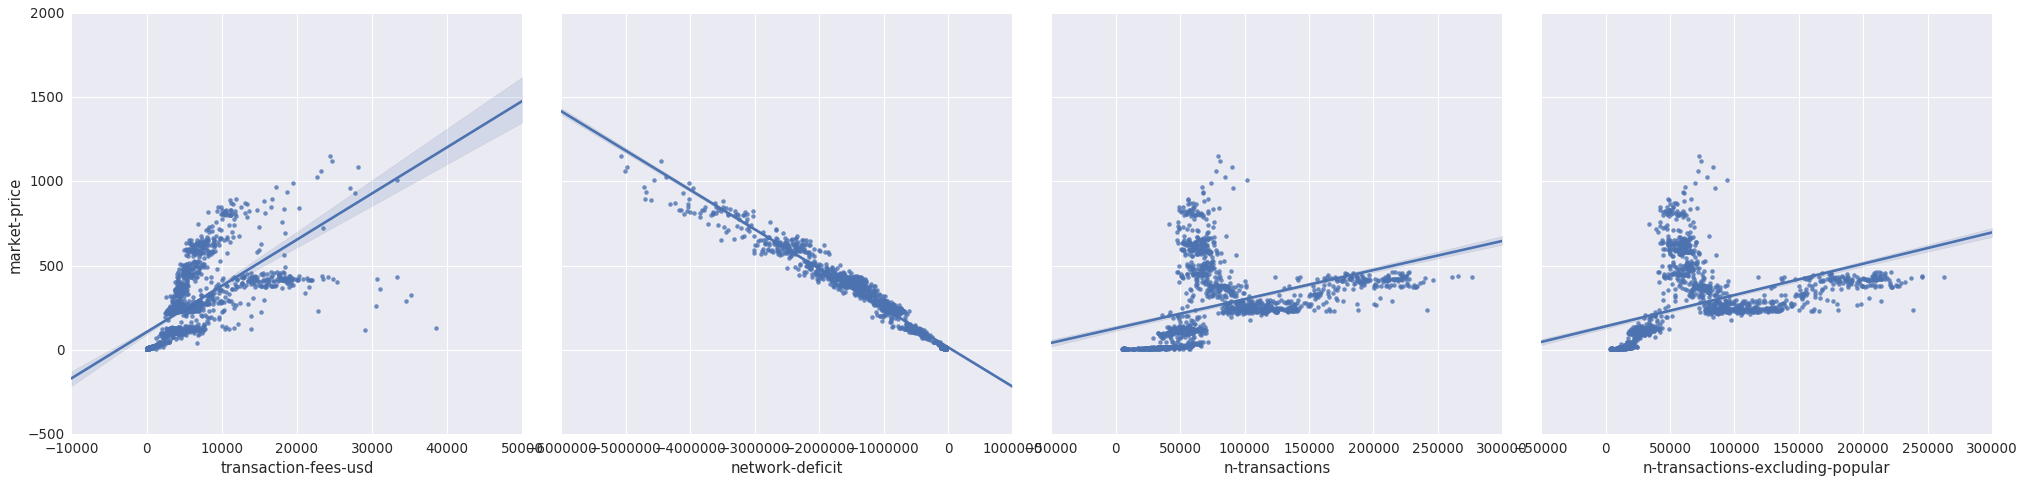

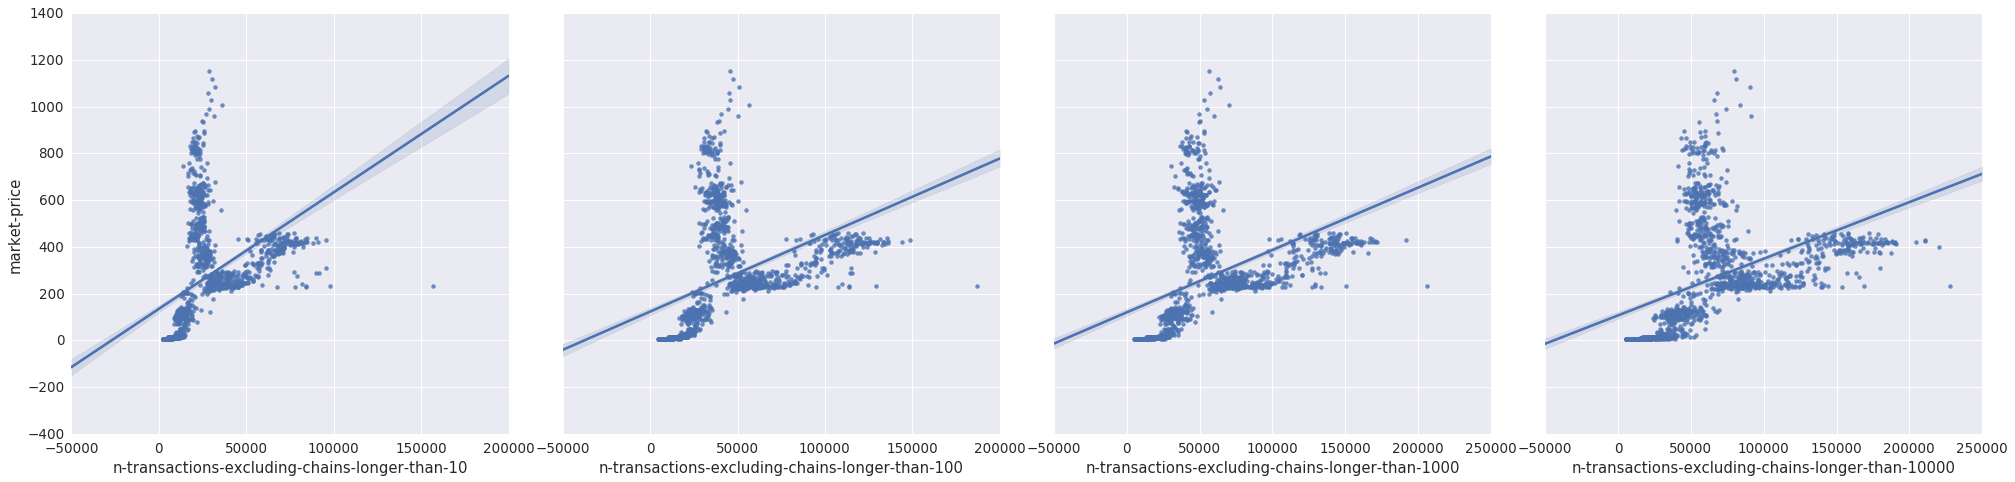

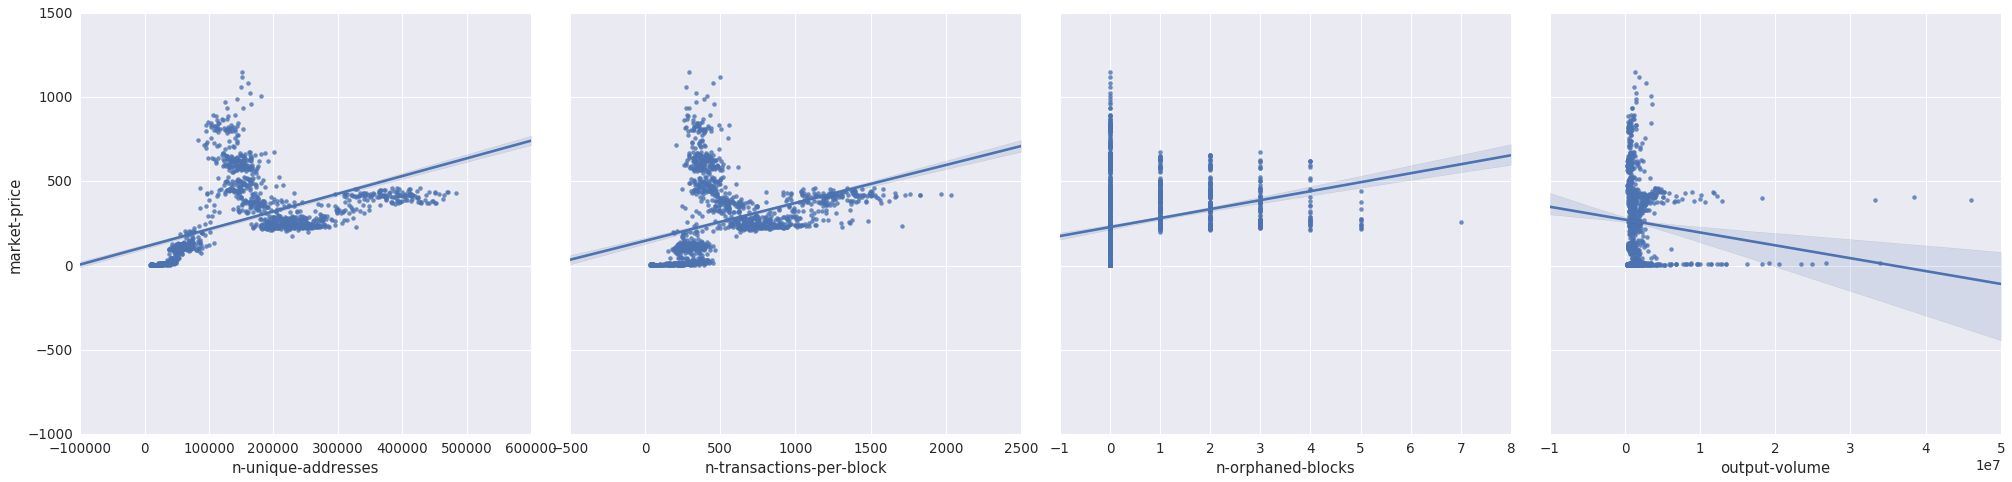

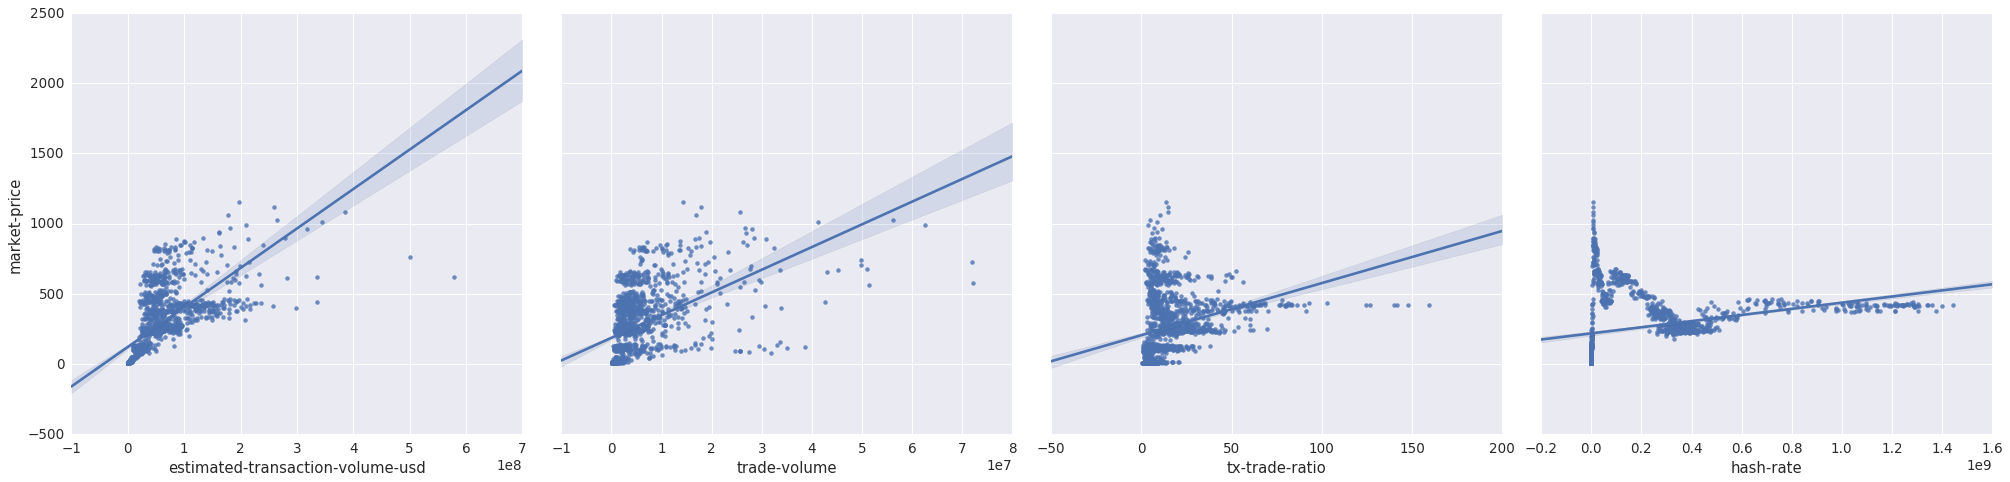

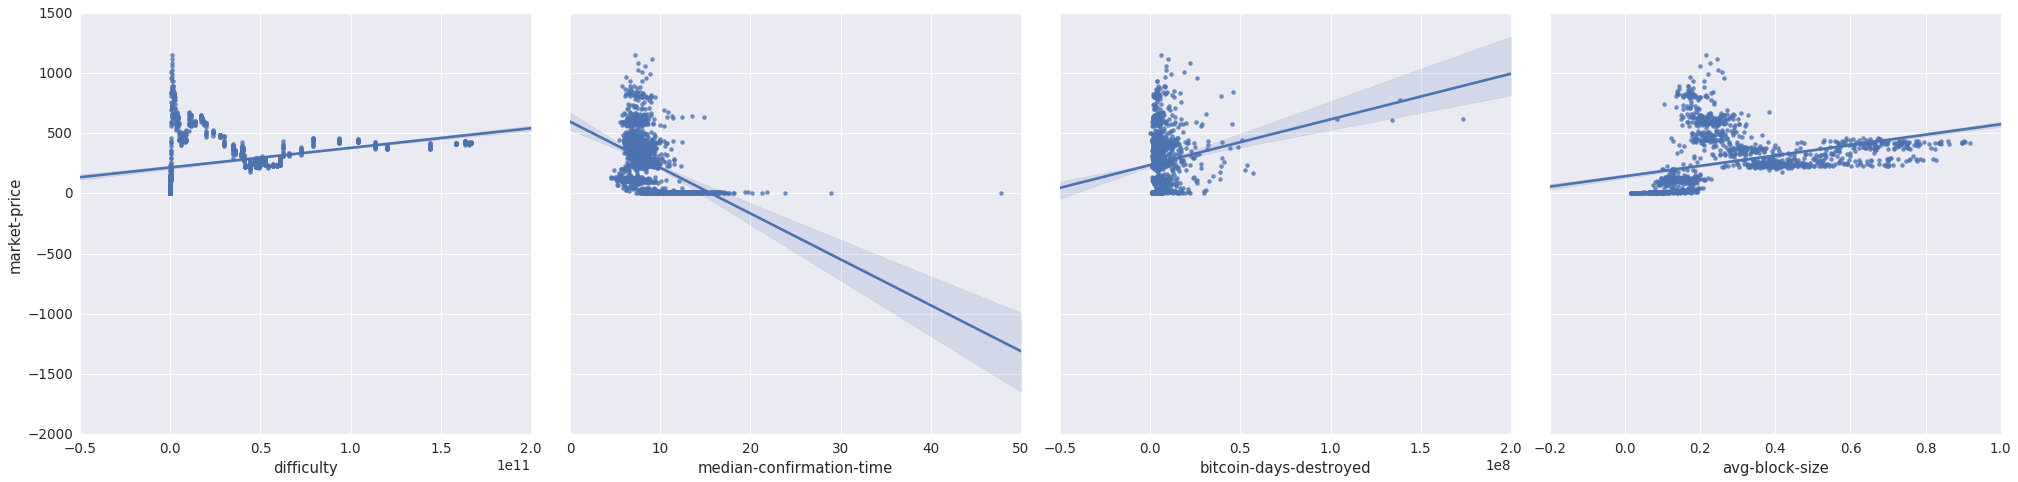

In [103]:
data = pd.concat(FRAMES, axis = 1)
sns.set_context("notebook", font_scale=1.35)
sns.pairplot(data, x_vars = CHARTS[1:4], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[4:8], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[8:12], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[12:16], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[16:20], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.pairplot(data, x_vars = CHARTS[20:], y_vars = CHARTS[0], size = 7, kind = 'reg')
sns.set()

# NSGA2-MLR feature selection with R2, RMSE and MAE metrics

Features selected by NSGAII-MLR with R2:
 ['market-price', 'cost-per-transaction', 'output-volume', 'median-confirmation-time'] 

Chromosome:  [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0] 


Features selected by NSGAII-MLR with RMSE:
 ['market-price', 'market-cap', 'difficulty', 'median-confirmation-time'] 

Chromosome:  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0] 


Features selected by NSGAII-MLR with MAE:
 ['market-price', 'market-cap', 'n-transactions', 'output-volume', 'trade-volume', 'median-confirmation-time'] 

Chromosome:  [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0] 


Features selected by NSGAII-MLR with R2:
 ['market-price', 'market-cap', 'n-transactions', 'output-volume', 'median-confirmation-time'] 

Chromosome:  [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0] 


Features selected by NSGAII-MLR with RMSE:
 ['market-price', 'cost-per-transaction', 'median-confirmat

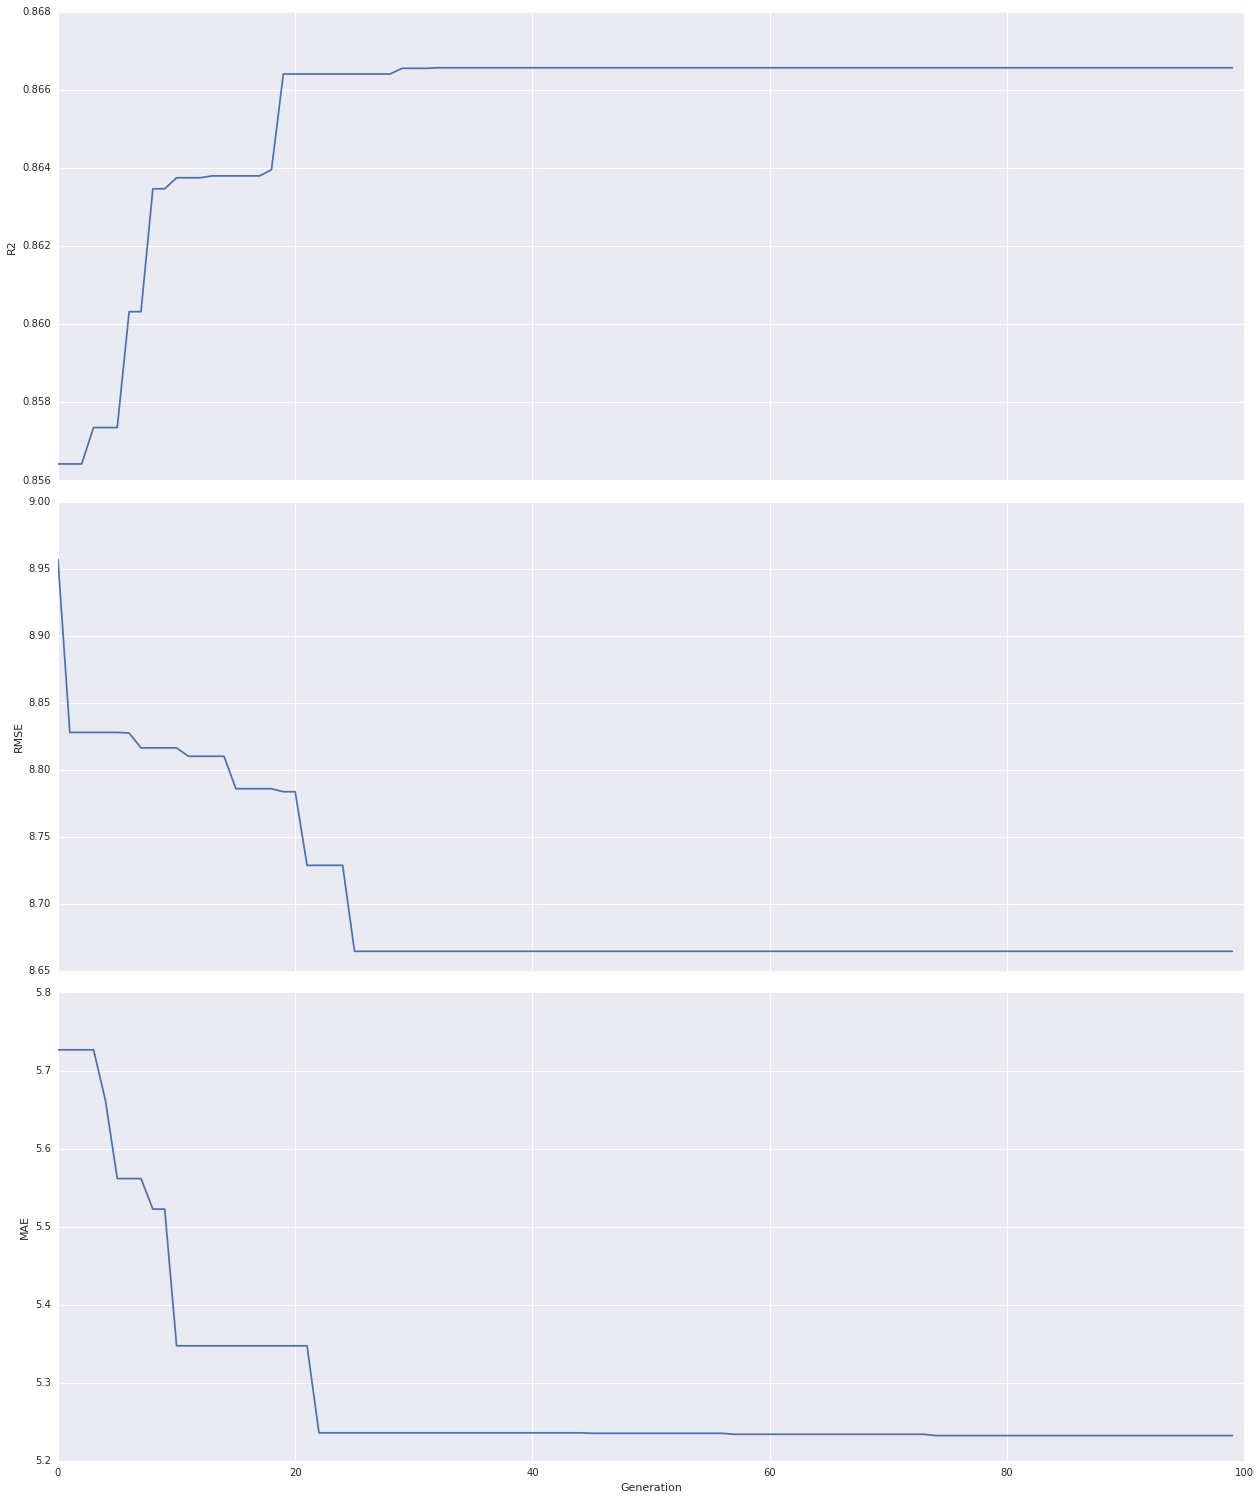

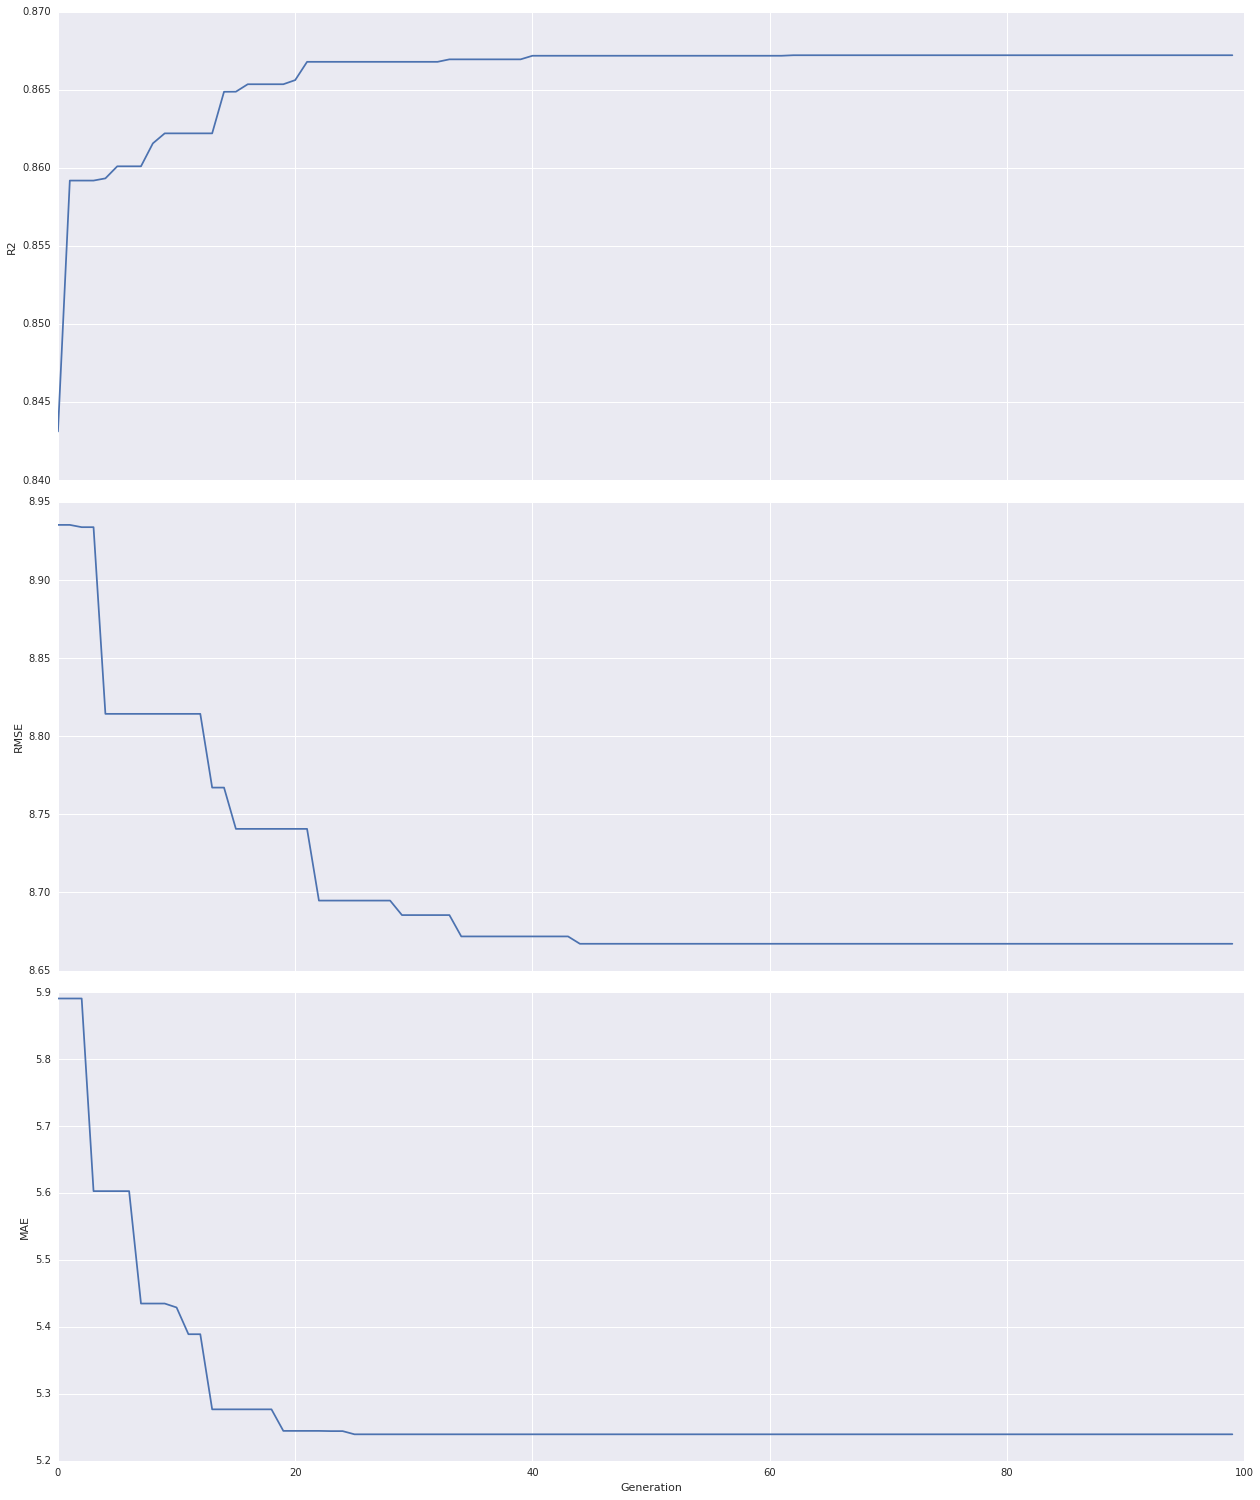

In [104]:
def feature_selection(gen_num, indiv_num):
    
    regr = linear_model.LinearRegression()

    r2_results = nsga2_feat_sel(regr, regr.score, (1.0, -1.0), gen_num, indiv_num)

    print ('Features selected by NSGAII-MLR with R2:\n', r2_results[1], '\n')
    print ('Chromosome: ', r2_results[2], '\n\n')

    RMSE = lambda x, y: np.sqrt(mse(y, regr.predict(x)))
    rmse_results = nsga2_feat_sel(regr, RMSE, (-1.0, -1.0), gen_num, indiv_num)

    print ('Features selected by NSGAII-MLR with RMSE:\n', rmse_results[1], '\n')
    print ('Chromosome: ', rmse_results[2], '\n\n')
    
    MAE = lambda x, y: mae(y, regr.predict(x))
    mae_results = nsga2_feat_sel(regr, MAE, (-1.0, -1.0), gen_num, indiv_num)

    print ('Features selected by NSGAII-MLR with MAE:\n', mae_results[1], '\n')
    print ('Chromosome: ', mae_results[2], '\n\n')
    
    # Create dataframes from the metrics
    r2_df = pd.DataFrame(r2_results[0], columns = ['R2'])
    rmse_df = pd.DataFrame(rmse_results[0], columns = ['RMSE'])
    mae_df = pd.DataFrame(mae_results[0], columns = ['MAE'])
    
    # Concatenate the metrics dataframes for visualization
    metrics_df = pd.concat([r2_df, rmse_df, mae_df], axis = 1)
    metrics_df.insert(0, 'Generation', metrics_df.index)
    
    # Plot the best individuals of each generation based on the metrics
    g = sns.PairGrid(metrics_df, y_vars=['R2', 'RMSE', 'MAE'], x_vars = 'Generation', size=7, aspect = 2.5)
    g.map(plt.plot)
    
widgets.interact(feature_selection,  
                 gen_num = 100, 
                 indiv_num = 35)

# Visualizing the actual and predicted prices 

            market-price
2014-12-26      0.294044
2014-12-27      0.234964
2014-12-28      0.248174
2014-12-29      0.235137
2014-12-30      0.229073
            market-price
2012-01-05       6.39900
2012-01-06       7.22000
2012-01-07       7.01556
2012-01-08       7.20000
2012-01-09       7.20000
            market-price
2015-08-23     -0.136538
2015-08-24     -0.203415
2015-08-25     -0.165385
2015-08-26     -0.135845
2015-08-27     -0.138314
            market-price
2015-08-24        213.24
2015-08-25        222.02
2015-08-26        228.84
2015-08-27        228.27
2015-08-28        234.17
R2: 0.980219968
RMSE: 0.238655938 , RMSE%:  market-price    0.096263
dtype: float64 %
MAE: 0.219949401 , MAE%:  market-price    0.088718
dtype: float64 %

Sign change classification accuracy:  100.0 %


(234, 1)
(233, 1)
            market-price
2015-08-24        213.24
2015-08-25        222.02
2015-08-26        228.84
2015-08-27        228.27
2015-08-28        234.17
            market-price
2015

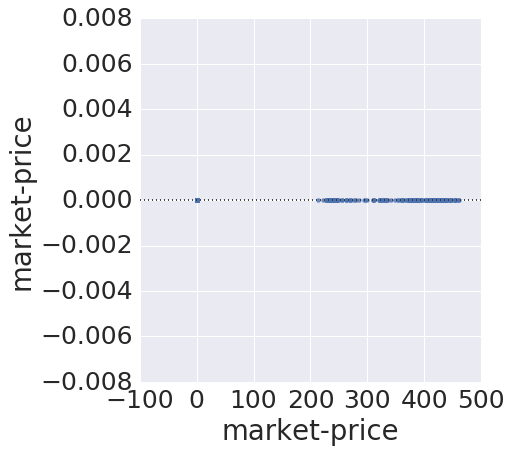

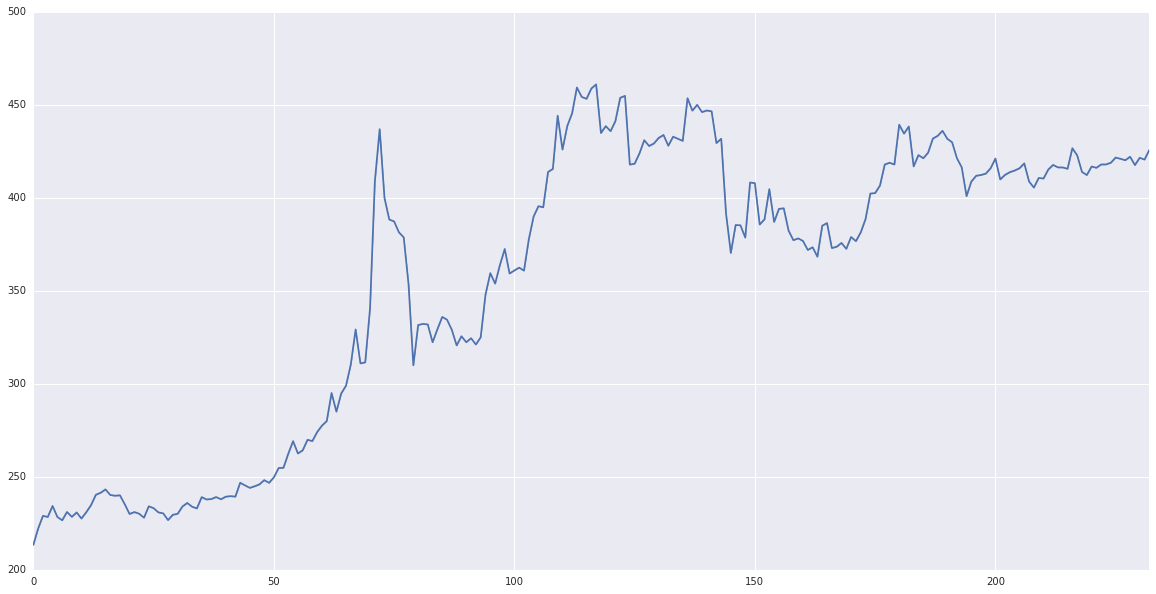

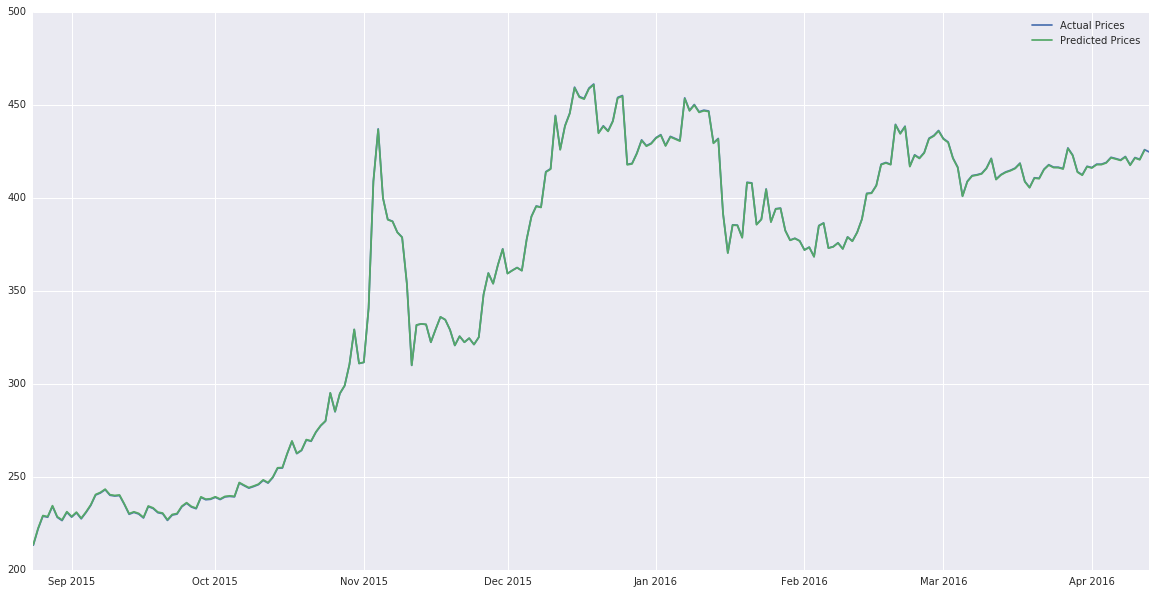

In [106]:
# Create the checkbox placeholder
box = widgets.VBox()
cbs = map(lambda x: widgets.Checkbox(description = x, value = False), CHARTS)
box.children=[i for i in cbs]
display(box)

button = widgets.Button(description="Evaluate Model", width = 5)

def evaluate(b):
    selected = []
    regr = linear_model.LinearRegression()
    
    # Populate the checkbox placeholder
    for i in range(len(CHARTS)):
        selected.append(box.children[i].value)

    filtered_features = filter_features(selected)
    filtered_features = pd.concat(filtered_features, axis = 1)
    
    # Generate date indices for the training data
    train_dates = filtered_features.index[:int(0.7*len(filtered_features))]
    
    # Generate the training set based on the date indices
    btc_X_train = filtered_features[train_dates[0] : train_dates[-2]]
    btc_y_train = pd.DataFrame(FRAMES[0])[train_dates[1] : train_dates[-1]]
    
    print(btc_X_train.tail())
    print(btc_y_train.head())

    # Train the learner on the training data
    # and evaluate the performance by the test data

    regr.fit(btc_X_train, btc_y_train)
    
    # Generate date indices for the testing data
    test_dates = filtered_features.index[int(0.85*len(filtered_features)):]
    
    # Generate the test set based on the date indices
    btc_X_test = filtered_features[test_dates[0] : test_dates[-2]]
    btc_y_test = pd.DataFrame(FRAMES[0])[test_dates[1] : test_dates[-1]]
    
    print(btc_X_test.head())
    print(btc_y_test.head())
    
    # Create a dataframe from the predicted values
    btc_y_pred = pd.DataFrame(regr.predict(btc_X_test[1:]), columns = ['market-price'])
    btc_y_pred.set_index(btc_X_test.index[1:],inplace = True)
    
    # Calculate the RMSE and MAE metric scores
    rmse_score = np.sqrt(mse(btc_y_test[:-1], btc_y_pred))
    mae_score = mae(btc_y_test[:-1], btc_y_pred)
    
    # Calculate the classification accuracy
    act_ticks = list(map(lambda t: np.sign(t[1] - t[0]), zip(btc_y_test.values, btc_y_test.values[1:-1])))
    pred_ticks = list(map(lambda t: np.sign(t[1] - t[0]), zip(btc_y_pred.values, btc_y_pred.values[1:])))
    act_pred_cmp = list(map(lambda t: t[0] == t[1], zip(act_ticks, pred_ticks)))
    accuracy = np.sum(act_pred_cmp) / len(act_ticks)
    
    max_min_spread = np.max(btc_y_test) - np.min(btc_y_test)
    print ('R2: %.9f' % (regr.score(btc_X_test, btc_y_test)))
    print ('RMSE: %.9f' % rmse_score, ', RMSE%: ', 100 * rmse_score / max_min_spread, '%')
    print ('MAE: %.9f' % mae_score, ', MAE%: ', 100 * mae_score / max_min_spread, '%')
    print ('\nSign change classification accuracy: ', 100 * accuracy, '%\n\n')
    
    # Create a dataframe for residual plots
    resid_df = pd.concat([btc_X_test, btc_y_pred], axis = 1)
    #resid_df.rename(columns = {'market-price': 'residuals'}, inplace=True)
    print(btc_X_test.shape)
    print(btc_y_pred.shape)
    
    # Plot the residuals
    sns.set_context("notebook", font_scale=2.5)
    g = sns.PairGrid(resid_df, x_vars=list(filtered_features.columns), y_vars=['market-price'], size=7)
    g.map(sns.residplot)
    sns.set()
    
    # Plot the time series of the actual and predicted values
    plt.figure(figsize = (20,10))
    sns.tsplot(data = [btc_y_test.values[:-1], btc_y_pred.values])
    
    plt.figure(figsize = (20,10))
    plt.plot(btc_y_test.index, btc_y_test, label = 'Actual Prices')
    plt.plot(btc_X_test.index[1:], btc_y_pred, label = 'Predicted Prices')
    plt.legend()
    
    print(btc_y_test.head())
    print(btc_y_pred.head())
    
button.on_click(evaluate)
display(button)

                         Price
Date                          
2012-01-04 18:15:05    5.60630
2012-01-05 18:15:05    6.39900
2012-01-06 18:15:05    7.22000
2012-01-07 18:15:05    7.01556
2012-01-08 18:15:05    7.20000
2012-01-09 18:15:05    7.20000
2012-01-10 18:15:05    6.89000
2012-01-11 18:15:05    7.13800
2012-01-12 18:15:05    6.99700
2012-01-13 18:15:05    6.85839
2012-01-14 18:15:05    6.75000
2012-01-15 18:15:05    6.98999
2012-01-16 18:15:05    7.18888
2012-01-17 18:15:05    6.98000
2012-01-18 18:15:05    6.95000
2012-01-19 18:15:05    6.30000
2012-01-20 18:15:05    6.58000
2012-01-21 18:15:05    6.55000
2012-01-22 18:15:05    6.39000
2012-01-23 18:15:05    6.45485
2012-01-24 18:15:05    6.51500
2012-01-25 18:15:05    6.45000
2012-01-26 18:15:05    6.20000
2012-01-27 18:15:05    5.68900
2012-01-28 18:15:05    5.74815
2012-01-29 18:15:05    5.76000
2012-01-30 18:15:05    5.60000
2012-01-31 18:15:05    5.65000
2012-02-01 18:15:05    5.63800
2012-02-02 18:15:05    6.20000
...     

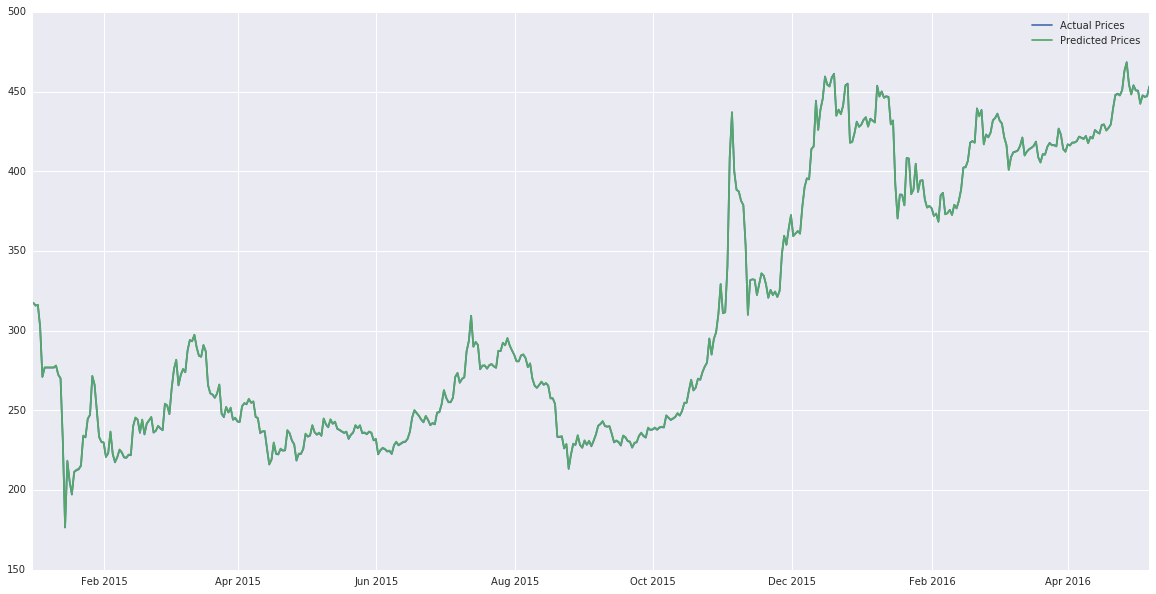

In [101]:
url = URL = 'https://blockchain.info/charts/market-price?timespan=all&format=csv'
date_parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

regr = linear_model.LinearRegression()

data = pd.read_csv(url, parse_dates=[0], date_parser = date_parse)
data.columns = ['Date', 'Price']
data.set_index('Date', inplace = True)
data.index = pd.to_datetime(data.index)

X_train = data['2012-01-04' : '2014-12-30']
y_train = data['2012-01-05' : '2014-12-31']
X_test = data['2014-12-30':'2016-05-07']
y_test = data['2014-12-31':'2016-05-07']

print(X_train)
print(y_train)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test[1:])

act_ticks = list(map(lambda t: np.sign(t[1] - t[0]), zip(y_test.values, y_test.values[1:-1])))
pred_ticks = list(map(lambda t: np.sign(t[1] - t[0]), zip(y_pred, y_pred[1:])))
act_pred_cmp = list(map(lambda t: t[0] == t[1], zip(act_ticks, pred_ticks)))
accuracy = np.sum(act_pred_cmp) / len(act_ticks)

print(accuracy)


plt.figure(figsize = (20,10))
plt.plot(y_test.index, y_test, label = 'Actual Prices')
plt.plot(X_test.index[1:], y_pred, label = 'Predicted Prices')
plt.legend()

#print(y_test.tail())
print(y_pred)